In [ ]:
fra = Dataset('FRA_msk_alt/fra.nc', 'r')
top = fra['FRA_msk_alt']
top = top[:-100,:1650]

In [ ]:
fra_long = fra['longitude'][:].data
fra_lat = fra['latitude'][:].data
long_regress = stats.linregress(fra_long, np.arange(fra_long.size), )
m_long, offset_long = long_regress.slope, long_regress.intercept
lat_regress = stats.linregress(fra_lat, np.arange(fra_lat.size))
m_lat, offset_lat = lat_regress.slope, lat_regress.intercept

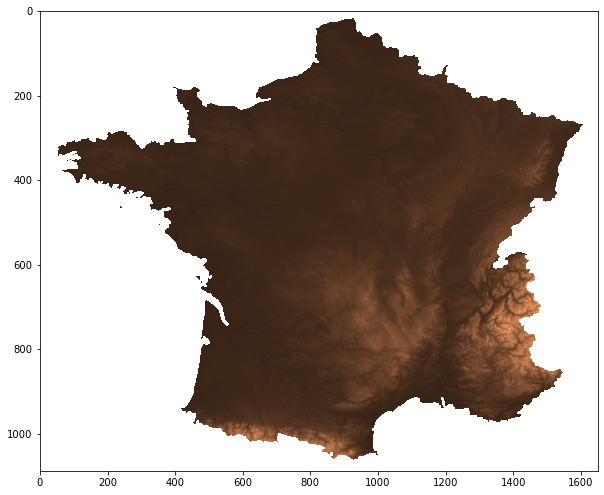

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
elev = top[:] + 1000
ax.imshow(elev, cmap='copper', vmin=0, vmax=elev.max())
ax.set_aspect(1.25)

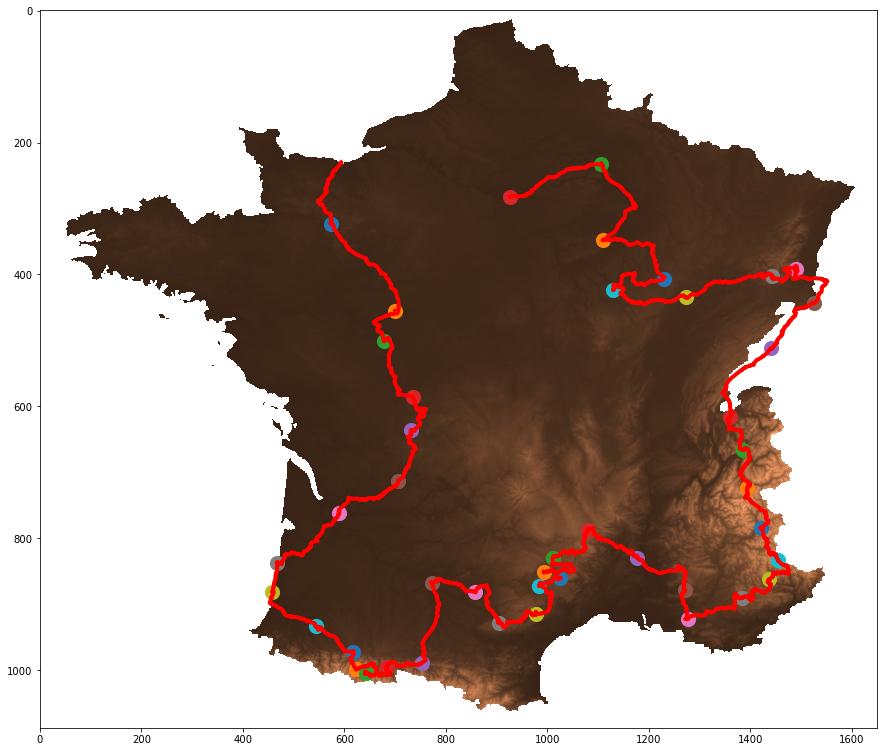

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
elev = top[:] + 1000
ax.imshow(elev, cmap='copper', vmin=0, vmax=elev.max())
ax.set_aspect(1.3)

for idx,ride in df.iterrows():
    x = ride.longs * m_long + offset_long
    y = ride.lats * m_lat + offset_lat
    plt.plot(x, y, linewidth=4, c='r')
    plt.scatter(x[-1], y[-1], s=200)

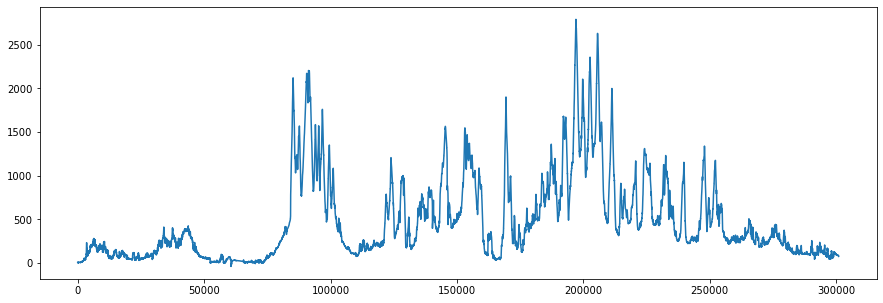

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
plt.plot(elevs)

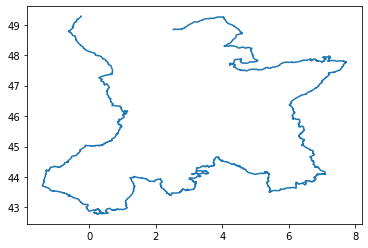

In [ ]:
all_lats = np.concatenate(df.lats)
all_longs = np.concatenate(df.longs)
plt.plot(all_longs, all_lats)

In [ ]:
elevs = np.concatenate(df.elevs)

In [ ]:
all_dists = [ geopy.distance.distance(
                (all_lats[i-1], all_longs[i-1]),
                (all_lats[i], all_longs[i])).m for i in range(1,all_lats.size) ]

In [ ]:
all_dists = np.array(all_dists)

In [ ]:
tot = np.sum(all_dists)
cumdist = np.cumsum(all_dists)

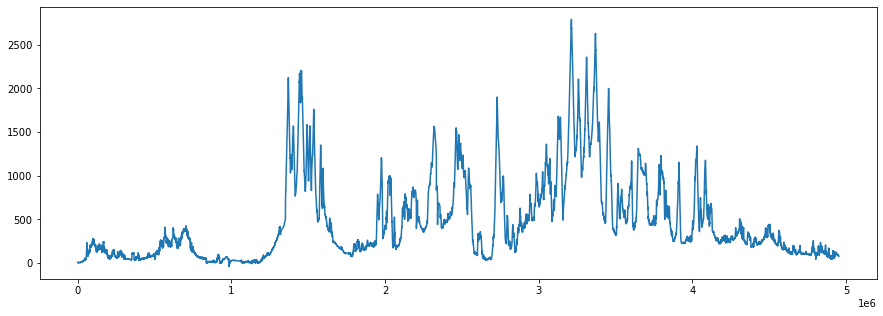

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
plt.plot(cumdist, elevs[1:])